In [1]:
from random import seed
from random import random
from math import exp
import math
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
from sklearn.preprocessing import normalize

# Reading Data

In [ ]:
folder1="C:/Users/rajat/Downloads/Data/emotion_images/train"
#folder1 = "/train"
def load_images(folder):
    images = []
    label = []
    for filename in os.listdir(folder):
        img = mpimg.imread(os.path.join(folder, filename))
        label.append(filename.split('.')[1])
        if img is not None:
            images.append(img)
    return images,label
imag,label = load_images(folder1)
c = np.zeros((101*101, 20))
for i in range(20):
    c[:,i:i+1] = imag[i].reshape(101*101,1)
column_sums = np.sum(c,1)
column_sums = column_sums.reshape(101*101,1)
mean = column_sums/20
X = c - mean
def PCA(X, k):
    row,len_ = X.shape
    Y = np.dot(X.transpose(),X)
    Y = Y/len_
    eigenValues,eigenVectors = np.linalg.eig(Y)
    idx = np.argsort(eigenValues)[::-1]
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    eigenVectors = eigenVectors[:,0:k]
    eigenValues1 = len_*eigenValues
    eigenValues1 = eigenValues1[:k]
    eigenValues1 = eigenValues1**(-1/2)
    D = np.diag(eigenValues1)
    U = np.dot(X,eigenVectors)
    U = np.dot(U,D)
   # print(U.shape)
    return U
U = PCA(X,12)
new_data = np.dot(U.transpose(),X)
label1 = np.array(label)
Y = np.zeros((len(label),2),dtype = 'int')
Y[:,0][label1=='happy']=1
Y[:,1][label1=='sad']=1

In [54]:
train_label = Y.T

In [ ]:
#D = amax(new_data,0)
new_data = new_data
train_data = new_data.T
folder2 = "C:/Users/rajat/Downloads/Data/emotion_images/test/"
imag1,label_ = load_images(folder2)
T2 = np.array(imag1)
No_of_test_images,length,breadth = T2.shape
c1 = np.zeros((length*breadth, No_of_test_images))
#c1 = np.array
for i in range(No_of_test_images):
    c1[:,i:i+1] = imag1[i].reshape(101*101,1)
X1 = c1 - mean
new_data1 = np.dot(U.transpose(),X1)
label2 = np.array(label_)
Y1 = np.zeros((len(label2),2),dtype = 'int')
Y1[:,0][label2=='happy']=1
Y1[:,1][label2=='sad']=1
test_data = new_data1.T
test_data = test_data

In [56]:
test_label = Y1.T

In [57]:
train_data = train_data.T
test_data = test_data.T
test_data = test_data/np.linalg.norm(test_data)
train_data = train_data/np.linalg.norm(train_data)

In [58]:
def Relu(A):
    X = np.where(A>0,A,0)
    return X
def softmax(A):
    row,col = A.shape
    A = A/np.linalg.norm(A)
    X = np.exp(A)
    Y = X/np.sum(X,axis=0)
    return Y
def dRelu(A):
    X = np.where(A>0,1,0)
    return X

In [93]:
class NN:
    def __init__(self,input_,output_):
        self.X = input_
        self.Y = output_
        return
    
    def initialise(self,dims):
        self.param = {}
        self.param['W1'] = np.random.randn(dims[1], dims[0]) / np.sqrt(dims[0])
        self.param['b1'] = np.zeros((dims[1], 1))
        self.param['W2'] = np.random.randn(dims[2], dims[1]) / np.sqrt(dims[1]) 
        self.param['b2'] = np.zeros((dims[2], 1))
        self.param['W3'] = np.random.randn(dims[3], dims[2]) / np.sqrt(dims[2])
        self.param['b3'] = np.zeros((dims[3], 1))
        return
    
    def forward(self,X):
        ch = {}
        Z1 = np.matmul(self.param['W1'],X) + self.param['b1']
        A1 = Relu(Z1)
        ch['Z1'],ch['A1'] = Z1,A1
        
        Z2 = np.matmul(self.param['W2'],A1) + self.param['b2']
        A2 = Relu(Z2)
        ch['Z2'],ch['A2'] = Z2,A2
        
        Z3 = np.matmul(self.param['W3'],A2) + self.param['b3'] 
       # D = np.amax(np.absolute(Z3))
        A3 = softmax(Z3)
        ch['Z3'],ch['A3']=Z3,A3
        Yh=A3
        
        return Yh,ch
    
    def backward(self,ch,Yh,lr):
        e1 = self.Y - Yh
        dW3 = np.matmul(e1,ch['A2'].T)
        db3 = e1.sum(axis=1,keepdims = True)
        e2 = np.matmul(self.param['W3'].T,e1)
        
        e2_ = np.multiply(e2,dRelu(ch['Z2']))
        dW2 = np.matmul(e2_,ch['A1'].T)
        db2 = e2_.sum(axis=1,keepdims = True)
        e3 = np.matmul(self.param['W2'].T,e2)
        e3_ = np.multiply(e3,dRelu(ch['Z1']))
        dW1 = np.matmul(e3_,self.X.T)
        db1 = e3_.sum(axis=1,keepdims = True)
        self.param['W1'] = self.param['W1'] + lr*dW1
        self.param['W2'] = self.param['W2'] + lr*dW2
        self.param['W3'] = self.param['W3'] + lr*dW3
        #self.param['b1'] = self.param['b1'] + lr*db1
        #self.param['b2'] = self.param['b2'] + lr*db2
        #self.param['b3'] = self.param['b3'] + lr*db3
        return
    
    def momentum_backward(self,ch,Yh,lr,n):
        learn = []
        e1 = self.Y - Yh
        dW3 = np.matmul(e1,ch['A2'].T)
        db3 = e1.sum(axis=1,keepdims = True)
        e2 = np.matmul(self.param['W3'].T,e1)
        
        e2_ = np.multiply(e2,dRelu(ch['Z2']))
        dW2 = np.matmul(e2_,ch['A1'].T)
        db2 = e2_.sum(axis=1,keepdims = True)
        e3 = np.matmul(self.param['W2'].T,e2)
        e3_ = np.multiply(e3,dRelu(ch['Z1']))
        dW1 = np.matmul(e3_,self.X.T)
        db1 = e3_.sum(axis=1,keepdims = True)
        lr1 = 0.9*lr[0] + n*dW1
        learn.append(lr1)
        self.param['W1'] = self.param['W1'] + lr1
        lr2 = 0.9*lr[1] + n*dW2
        learn.append(lr2)
        self.param['W2'] = self.param['W2'] + lr2
        lr3 = 0.9*lr[2] + n*dW3
        learn.append(lr3)
        self.param['W3'] = self.param['W3'] + lr3
        lr4 = 0.9*lr[3] + n*db1
        learn.append(lr4)
        self.param['b1'] = self.param['b1'] + lr4
        lr5 = 0.9*lr[4] + n*db2
        learn.append(lr5)
        self.param['b2'] = self.param['b2'] + lr5
        lr6 = 0.9*lr[5] + n*db3
        learn.append(lr6)
        self.param['b3'] = self.param['b3'] + lr6
       # learn = np.array(learn)
        return learn

# With 10 neurons

In [94]:
def error_(Y,T):
    total = T*np.log(Y)
    return -1*total.sum()

In [108]:
dim = [12, 10, 10, 2]
n2 = NN(train_data,train_label)
n2.initialise(dim)
error = []
epoch = []

for i in range(20):
    output,ch = n2.forward(train_data)
    e = error_(output,train_label)
    error.append(e)
    epoch.append(i)
    n2.backward(ch,output,0.004)

Text(0, 0.5, 'error')

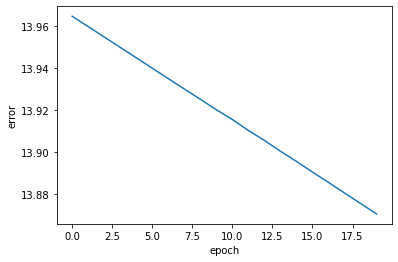

In [109]:
plt.plot(epoch,error)
plt.xlabel('epoch')
plt.ylabel('error')

# Accuracy on test data

In [110]:
out,ch = n2.forward(test_data)
out = np.round(out)
out = np.array(out,dtype = 'int')
test = np.zeros(10)
test[test_label[0,:]==out[0,:]] = 1
print(np.sum(test)*10,'%')

60.0 %


# Accuracy on train data

In [111]:
out,ch = n2.forward(train_data)
out = np.round(out)
out = np.array(out,dtype='int')
train = np.zeros(20)
train[train_label[0,:]==out[0,:]] = 1
print(np.sum(train)*5,'%')

35.0 %


# With momentum

In [ ]:
dim = [12, 10, 10, 2]
n2 = NN(train_data,train_label)
n2.initialise(dim)
error = []
epoch = []
learn = []
w1 = np.zeros((dim[1],dim[0]))
learn.append(w1)
w2 = np.zeros((dim[2],dim[1]))
learn.append(w2)
w3 = np.zeros((dim[3],dim[2]))
learn.append(w3)
b1 = np.zeros((dim[1],1))
learn.append(b1)
b2 = np.zeros((dim[2],1))
learn.append(b2)
b3 = np.zeros((dim[3],1))
learn.append(b3)

for i in range(20):
    output,ch = n2.forward(train_data)
    e = error_(output,train_label)
    error.append(e)
    epoch.append(i)
    learn = n2.momentum_backward(ch,output,learn,0.006)

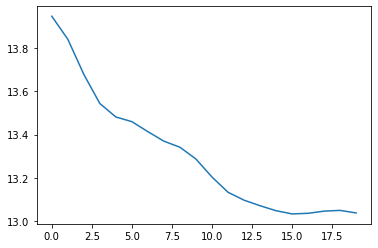

In [100]:
plt.plot(epoch,error)

# Test accuracy

In [101]:
out,ch = n2.forward(test_data)
out = np.round(out)
out = np.array(out,dtype = 'int')
test = np.zeros(10)
test[test_label[0,:]==out[0,:]] = 1
print(np.sum(test)*10,'%')

40.0 %


# Train accuracy

In [102]:
out,ch = n2.forward(train_data)
out = np.round(out)
out = np.array(out,dtype='int')
train = np.zeros(20)
train[train_label[0,:]==out[0,:]] = 1
print(np.sum(train)*5,'%')

60.0 %


# With 15 neurons

# Without momentum

In [103]:
dim = [12, 15, 15, 2]
n3 = NN(train_data,train_label)
n3.initialise(dim)
error = []
epoch = []

for i in range(20):
    output,ch = n3.forward(train_data)
    e = error_(output,train_label)
    error.append(e)
    epoch.append(i)
    n3.backward(ch,output,0.006)

Text(0, 0.5, 'error')

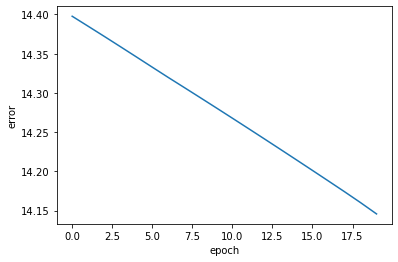

In [104]:
plt.plot(epoch,error)
plt.xlabel('epoch')
plt.ylabel('error')

# Accuracy on train data

In [105]:
out,ch = n3.forward(train_data)
out = np.round(out)
out = np.array(out,dtype='int')
train = np.zeros(20)
train[train_label[0,:]==out[0,:]] = 1
print(np.sum(train)*5,'%')

45.0 %


# Accuracy on test data

In [106]:
out,ch = n3.forward(test_data)
out = np.round(out)
out = np.array(out,dtype='int')
test = np.zeros(10)
test[test_label[0,:]==out[0,:]] = 1
print(np.sum(test)*5,'%')

25.0 %


# Model has been overfitted here because of 15 neurons

# With momentum

In [48]:
dim = [12, 15, 15, 2]
n3 = NN(train_data,train_label)
n3.initialise(dim)
error = []
epoch = []
learn = []
w1 = np.zeros((dim[1],dim[0]))
learn.append(w1)
w2 = np.zeros((dim[2],dim[1]))
learn.append(w2)
w3 = np.zeros((dim[3],dim[2]))
learn.append(w3)
b1 = np.zeros((dim[1],1))
learn.append(b1)
b2 = np.zeros((dim[2],1))
learn.append(b2)
b3 = np.zeros((dim[3],1))
learn.append(b3)

for i in range(20):
    output,ch = n3.forward(train_data)
    e = error_(output,train_label)
    error.append(np.linalg.norm(e))
    epoch.append(i)
    learn = n3.momentum_backward(ch,output,learn,0.006)

Text(0, 0.5, 'error')

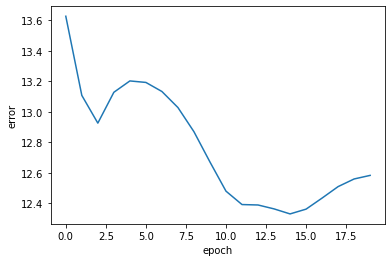

In [49]:
plt.plot(epoch,error)
plt.xlabel('epoch')
plt.ylabel('error')

# Accuracy on train data

In [50]:
out,ch = n3.forward(train_data)
out = np.round(out)
out = np.array(out,dtype='int')
train = np.zeros(20)
train[train_label[0,:]==out[0,:]] = 1
print(np.sum(train)*5,'%')

70.0 %


# Accuracy on test data

In [51]:
out,ch = n3.forward(test_data)
out = np.round(out)
out = np.array(out,dtype='int')
test = np.zeros(10)
test[test_label[0,:]==out[0,:]] = 1
print(np.sum(test)*5,'%')

20.0 %
